In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# importing the packages I think I'll need

In [2]:
requests.get('http://google.com')
# double checking I can pull in an API

<Response [200]>

In [3]:
standings = requests.get('https://api-football-standings.azharimm.site/leagues/eng.1/standings?season=2020&sort=asc')
print(standings.json())
# accessing the API, storing it in 'standings' and printing its layout to the screen

{'status': True, 'data': {'name': 'English Premier League', 'abbreviation': 'Prem', 'seasonDisplay': '2020-2021', 'season': 2020, 'standings': [{'team': {'id': '382', 'uid': 's:600~t:382', 'location': 'Manchester City', 'name': 'Manchester City', 'abbreviation': 'MNC', 'displayName': 'Manchester City', 'shortDisplayName': 'Man City', 'isActive': True, 'logos': [{'href': 'https://a.espncdn.com/i/teamlogos/soccer/500/382.png', 'width': 500, 'height': 500, 'alt': '', 'rel': ['full', 'default'], 'lastUpdated': '2019-05-08T16:07Z'}]}, 'note': {'color': '#81D6AC', 'description': 'Champions League', 'rank': 1}, 'stats': [{'name': 'wins', 'displayName': 'Wins', 'shortDisplayName': 'W', 'description': "Team's current Win-Loss record", 'abbreviation': 'W', 'type': 'wins', 'value': 27, 'displayValue': '27'}, {'name': 'losses', 'displayName': 'Losses', 'shortDisplayName': 'L', 'description': 'Losses', 'abbreviation': 'L', 'type': 'losses', 'value': 6, 'displayValue': '6'}, {'name': 'ties', 'displa

In [4]:
# looks like this API has dictionaries within dictionaries & lists within dictionaries also
standings_DF = pd.DataFrame(standings.json())
display(standings_DF)
# converting the data to a dataframe for easier manipulation and printing to the screen

,status,data
abbreviation,True,Prem
name,True,English Premier League
season,True,2020
seasonDisplay,True,2020-2021
standings,True,"[{'team': {'id': '382', 'uid': 's:600~t:382', ..."


In [5]:
print(standings_DF['data']['standings'])
# viewing the structure of the actual data & how it's stored
# lots of lists & dictionaires

[{'team': {'id': '382', 'uid': 's:600~t:382', 'location': 'Manchester City', 'name': 'Manchester City', 'abbreviation': 'MNC', 'displayName': 'Manchester City', 'shortDisplayName': 'Man City', 'isActive': True, 'logos': [{'href': 'https://a.espncdn.com/i/teamlogos/soccer/500/382.png', 'width': 500, 'height': 500, 'alt': '', 'rel': ['full', 'default'], 'lastUpdated': '2019-05-08T16:07Z'}]}, 'note': {'color': '#81D6AC', 'description': 'Champions League', 'rank': 1}, 'stats': [{'name': 'wins', 'displayName': 'Wins', 'shortDisplayName': 'W', 'description': "Team's current Win-Loss record", 'abbreviation': 'W', 'type': 'wins', 'value': 27, 'displayValue': '27'}, {'name': 'losses', 'displayName': 'Losses', 'shortDisplayName': 'L', 'description': 'Losses', 'abbreviation': 'L', 'type': 'losses', 'value': 6, 'displayValue': '6'}, {'name': 'ties', 'displayName': 'Draws', 'shortDisplayName': 'D', 'description': 'Draws', 'abbreviation': 'D', 'type': 'ties', 'value': 5, 'displayValue': '5'}, {'name

In [6]:
data_DF = pd.DataFrame(standings_DF['data']['standings'][0:20])
display(data_DF)
# pulling the standings information out of the nested array & store as a data frame

,team,note,stats
0,"{'id': '382', 'uid': 's:600~t:382', 'location'...","{'color': '#81D6AC', 'description': 'Champions...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
1,"{'id': '360', 'uid': 's:600~t:360', 'location'...","{'color': '#81D6AC', 'description': 'Champions...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
2,"{'id': '364', 'uid': 's:600~t:364', 'location'...","{'color': '#81D6AC', 'description': 'Champions...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
3,"{'id': '363', 'uid': 's:600~t:363', 'location'...","{'color': '#81D6AC', 'description': 'Champions...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
4,"{'id': '375', 'uid': 's:600~t:375', 'location'...","{'color': '#B2BFD0', 'description': 'Europa Le...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
5,"{'id': '371', 'uid': 's:600~t:371', 'location'...","{'color': '#B2BFD0', 'description': 'Europa Le...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
6,"{'id': '367', 'uid': 's:600~t:367', 'location'...","{'color': '#c6d1e0', 'description': 'Europa Co...","[{'name': 'wins', 'displayName': 'Wins', 'shor..."
7,"{'id': '359', 'uid': 's:600~t:359', 'location'...",NaN,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
8,"{'id': '357', 'uid': 's:600~t:357', 'location'...",NaN,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
9,"{'id': '368', 'uid': 's:600~t:368', 'location'...",NaN,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."


In [7]:
TeamNames = pd.DataFrame(data_DF['team'][0:20])
display(TeamNames)
# pulling the team dictionary into a seperate dataframe to extract the club name

,team
0,"{'id': '382', 'uid': 's:600~t:382', 'location'..."
1,"{'id': '360', 'uid': 's:600~t:360', 'location'..."
2,"{'id': '364', 'uid': 's:600~t:364', 'location'..."
3,"{'id': '363', 'uid': 's:600~t:363', 'location'..."
4,"{'id': '375', 'uid': 's:600~t:375', 'location'..."
5,"{'id': '371', 'uid': 's:600~t:371', 'location'..."
6,"{'id': '367', 'uid': 's:600~t:367', 'location'..."
7,"{'id': '359', 'uid': 's:600~t:359', 'location'..."
8,"{'id': '357', 'uid': 's:600~t:357', 'location'..."
9,"{'id': '368', 'uid': 's:600~t:368', 'location'..."


In [8]:
print(TeamNames['team'])
# viewing the club team name dataframe

0     {'id': '382', 'uid': 's:600~t:382', 'location'...
1     {'id': '360', 'uid': 's:600~t:360', 'location'...
2     {'id': '364', 'uid': 's:600~t:364', 'location'...
3     {'id': '363', 'uid': 's:600~t:363', 'location'...
4     {'id': '375', 'uid': 's:600~t:375', 'location'...
5     {'id': '371', 'uid': 's:600~t:371', 'location'...
6     {'id': '367', 'uid': 's:600~t:367', 'location'...
7     {'id': '359', 'uid': 's:600~t:359', 'location'...
8     {'id': '357', 'uid': 's:600~t:357', 'location'...
9     {'id': '368', 'uid': 's:600~t:368', 'location'...
10    {'id': '362', 'uid': 's:600~t:362', 'location'...
11    {'id': '361', 'uid': 's:600~t:361', 'location'...
12    {'id': '380', 'uid': 's:600~t:380', 'location'...
13    {'id': '384', 'uid': 's:600~t:384', 'location'...
14    {'id': '376', 'uid': 's:600~t:376', 'location'...
15    {'id': '331', 'uid': 's:600~t:331', 'location'...
16    {'id': '379', 'uid': 's:600~t:379', 'location'...
17    {'id': '370', 'uid': 's:600~t:370', 'locat

In [9]:
PremNames = {}
PremNames['Team Name'] = [index.get('name') for index in TeamNames.team]
print(PremNames)
# use a for loop to go through the rows in the team names dataframe and return the 'name' value
# saves the output as a dictionary

{'Team Name': ['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea', 'Leicester City', 'West Ham United', 'Tottenham Hotspur', 'Arsenal', 'Leeds United', 'Everton', 'Aston Villa', 'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace', 'Southampton', 'Brighton & Hove Albion', 'Burnley', 'Fulham', 'West Bromwich Albion', 'Sheffield United']}


In [10]:
PremNames_DF= pd.DataFrame(PremNames)
display(PremNames_DF)
# convert the dictionary to a dataframe and print it to the screen

,Team Name
0,Manchester City
1,Manchester United
2,Liverpool
3,Chelsea
4,Leicester City
5,West Ham United
6,Tottenham Hotspur
7,Arsenal
8,Leeds United
9,Everton


In [11]:
TeamStats = pd.DataFrame(data_DF['stats'])
display(TeamStats)
# pulling the stats list of dictionaries into a seperate dataframe to extract the club rank

,stats
0,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
1,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
2,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
3,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
4,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
5,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
6,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
7,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
8,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."
9,"[{'name': 'wins', 'displayName': 'Wins', 'shor..."


In [12]:
display(pd.DataFrame(TeamStats['stats'][0]))
# print out the data frame first row as a dataframe
# to get structural view and a view of indicies required

,name,displayName,shortDisplayName,description,abbreviation,type,value,displayValue,id,summary
0,wins,Wins,W,Team's current Win-Loss record,W,wins,27.0,27,NaN,NaN
1,losses,Losses,L,Losses,L,losses,6.0,6,NaN,NaN
2,ties,Draws,D,Draws,D,ties,5.0,5,NaN,NaN
3,gamesPlayed,Games Played,GP,Games Played,GP,gamesplayed,38.0,38,NaN,NaN
4,pointsFor,Goals For,F,Goals For,F,pointsfor,83.0,83,NaN,NaN
5,pointsAgainst,Goals Against,A,Goals Against,A,pointsagainst,32.0,32,NaN,NaN
6,points,Points,P,Points,P,points,86.0,86,NaN,NaN
7,rankChange,Rank Change,Rank Change,Rank Change,RC,rankchange,0.0,0,NaN,NaN
8,rank,Rank,Rank,Rank,R,rank,1.0,1,NaN,NaN
9,pointDifferential,Goal Difference,GD,Goal Difference,GD,pointdifferential,51.0,+51,NaN,NaN


In [13]:
TeamStats2 = [[d][0][8]['displayValue'] for d in TeamStats.stats]
display(TeamStats2)
# goes into the row, pulls the first index from the list - which is a dictionary
# so the indexes the 8th row of the dictionary - which is the rank information
# on the rank information row, extract the value of the rank
# print out the list of ranks

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20']

In [14]:
PremStats = {}
PremStats['Team Ramk'] = [[d][0][8]['displayValue'] for d in TeamStats.stats]
print(PremStats)
# used the for loop to save the team ranks in a dictionary & print the dictionary

{'Team Ramk': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']}


In [15]:
PremStats_DF= pd.DataFrame(PremStats)
display(PremStats_DF)
# convert the dictionary to a dataframe and print it to the screen

,Team Ramk
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [16]:
PremStandings = pd.concat([PremNames_DF, PremStats_DF], axis=1)
display(pd.DataFrame(PremStandings))
# merge the team name dataframe with the team rank data frame
# merge on the index - I wanted to keep the default index on each DF so I could merge them this way
# store it as a dataframe and print to the screen

,Team Name,Team Ramk
0,Manchester City,1
1,Manchester United,2
2,Liverpool,3
3,Chelsea,4
4,Leicester City,5
5,West Ham United,6
6,Tottenham Hotspur,7
7,Arsenal,8
8,Leeds United,9
9,Everton,10


In [17]:
CR7 = pd.read_csv("CR7data.csv")
# importing Cristiano Ronaldo club goals data from .csv files from Kaggle.

In [18]:
display(CR7.head())
# show first few rows of the dataset

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,NaN,90+5,3:0,Header
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN


In [19]:
display(CR7.info())
# return the information types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    698 non-null    int64 
 1   Goal_no       698 non-null    int64 
 2   Season        698 non-null    object
 3   Competition   698 non-null    object
 4   Matchday      698 non-null    object
 5   Venue         698 non-null    object
 6   Team          698 non-null    object
 7   Opponent      698 non-null    object
 8   Result        698 non-null    object
 9   Position      640 non-null    object
 10  Minute        698 non-null    object
 11  At_score      698 non-null    object
 12  Type_of_goal  683 non-null    object
dtypes: int64(2), object(11)
memory usage: 71.0+ KB


None

In [20]:
# so it's a dataframe with 698 rows & 13 columns
# two columns have missing values, so hopefully only minor cleaning required
# find the null values & sum them
missing_values_count = CR7.isnull().sum()
print(missing_values_count)

Unnamed: 0       0
Goal_no          0
Season           0
Competition      0
Matchday         0
Venue            0
Team             0
Opponent         0
Result           0
Position        58
Minute           0
At_score         0
Type_of_goal    15
dtype: int64


In [21]:
def size_NA(df, name):                 # Here we take in the dataframe & column name, represented by "df" & "name"
    missing_values = df[name].isnull().sum()  # assign the number of null cells in the column to missing_values
    total_rows = df.shape[0]                 # assign the number of rows in the dataframe to total_rows
    percentNA = (missing_values / total_rows) * 100 # assign the % of rows in the df that contain null values to percentNA
    return percentNA       # And now we return this function as the variable "percentNA"

In [22]:
size_NA(CR7,'Position')
# call the defined function, passing in the dataframe & the attribute with the highest number of NA values

8.30945558739255

In [23]:
# based on this I would lose roughly 8% of my data by doing a drop NA.
droprows= CR7.dropna() # set the data with NAs dropped (rows) as droprows
print(CR7.shape,droprows.shape) # print the shape of original data, print the shape of the data with NA rows dropped

(698, 13) (634, 13)


In [24]:
drop_duplicates= CR7.drop_duplicates() # perform drop duplicates on CR7 & save in drop duplicates
print(CR7.shape,drop_duplicates.shape) # print the shape of CR7 & drop duplicates

(698, 13) (698, 13)


In [25]:
# so no duplicates in our dataframe
# missing 64 goals if I drop the NAs
# think I'll fill them instead as I don't want to lose any goals
# I set my fillna function to fill NAs in the column 'Position' with "Forward" & 'Type_of_goal' with Body
# print the dataframe
# now I have no duplicates & no NAs in my data
CR7.fillna({'Position':'Forward', 'Type_of_goal':'Body'}, inplace=True)
display(CR7)

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header
694,694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick
695,695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot
696,696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot


In [26]:
CR7['# of Goals']=1
# add a column of 1s into the DF so I can perform sum, mean,etc. calculations on the data
display(CR7)

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,1
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
694,694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
695,695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
696,696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1


In [27]:
CR7.drop('Unnamed: 0', axis=1, inplace=True) # remove the Unnamed column
display(CR7)

,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,1
1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1
2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1


In [28]:
CR7_reverse = CR7.sort_values('Goal_no', ascending = False) # sort data in reverse, ie. newest goal to oldest goal
display(CR7_reverse)

,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
697,698,21/22,Premier League,35,H,Manchester United,Brentford FC,3:0,CF,61,2:0,Penalty,1
696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1
695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1


In [29]:
display(CR7)

,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal,# of Goals
0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,1
1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,Forward,90+5,3:0,Header,1
2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,Forward,88,1:2,Right-footed shot,1
3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,Forward,67,3:0,Left-footed shot,1
4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,Forward,13,3:0,Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,1
694,695,21/22,Premier League,33,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,1
695,696,21/22,Premier League,34,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,1
696,697,21/22,Premier League,37,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,1


In [30]:
# prints out the type & opposition of the first goal scored by CR7
x = CR7.index[0]
if x in CR7.index:
    print("CR7's first goal was a "+str(CR7.iloc[x, 11]+str(" against ")+str(CR7.iloc[x,6])))  

CR7's first goal was a Solo run against Moreirense FC


In [31]:
# prints out the type & opposition of the last goal scored by CR7
x = CR7.index[-1]
if x in CR7.index:
    print("CR7's last goal was a "+str(CR7.iloc[x, 11]+str(" against ")+str(CR7.iloc[x,6]))) 

CR7's last goal was a Penalty against Brentford FC


In [32]:
print(CR7.groupby('Position')['# of Goals'].apply(np.sum))
# Create a subset dataset of the CR7 goal data (Position) & print it

Position
CF         198
CF           3
Forward     58
LW         355
LW           5
RW          79
Name: # of Goals, dtype: int64


In [33]:
Position = {}
Position['Position'] = [d for d in CR7.Position]
print(Position)
# used a for loop to save Position column as a dictionary & print the dictionary
# trying to find the anomalies in the position - ie. why I have 2 CFs and 2 LWs in the groupby.

{'Position': ['LW', 'Forward', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'Forward', 'Forward', 'RW', 'Forward', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'RW', 'Forward', 'RW', 'Forward', 'CF', 'Forward', 'RW', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'Forward', 'RW', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'Forward', 'Forward', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'LW', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'LW', 'Forward', 'LW', 'LW', 'LW', 'CF', 'Forward', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'RW', 'CF', 'CF', 'RW', 'RW', 'Forward', 'CF', 'CF', 'RW'

In [34]:
CR7['Position'] = CR7['Position'].str.replace('CF ','CF')
CR7['Position'] = CR7['Position'].str.replace('LW ','LW')
# overwrite instances of CF & LW, trying to stop the duplication in position when we grouby position

In [35]:
print(CR7.groupby('Position')['# of Goals'].apply(np.sum))
# print groupby again to see did it work

Position
CF         201
Forward     58
LW         360
RW          79
Name: # of Goals, dtype: int64


In [36]:
PositionGoals = pd.DataFrame(CR7.groupby('Position')['# of Goals'].apply(np.sum).reset_index())
display(PositionGoals)
# Create a subset dataset of the CR7 goal data (Position) & print it

,Position,# of Goals
0,CF,201
1,Forward,58
2,LW,360
3,RW,79


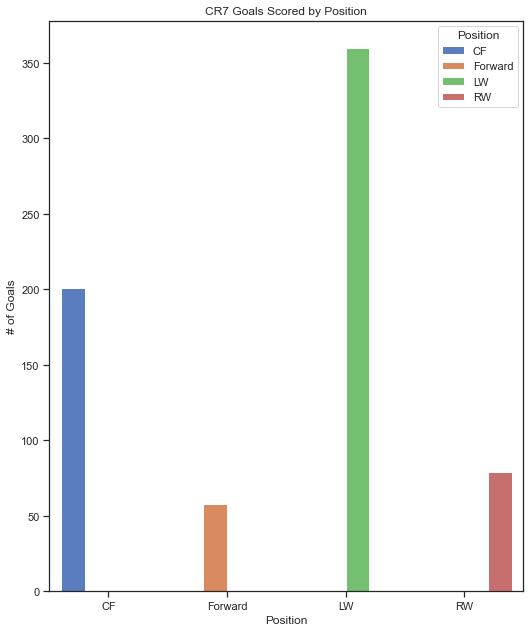

In [37]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=PositionGoals, y='# of Goals', x='Position', hue='Position')
ax.set(ylabel="# of Goals")
ax.set(xlabel="Position")
ax.set(title="CR7 Goals Scored by Position")
ax.figure.set_size_inches(8.5, 10.5)

In [38]:
CompGoals = pd.DataFrame(CR7.groupby('Competition')['# of Goals'].apply(np.sum).reset_index())
display(CompGoals)

,Competition,# of Goals
0,Copa del Rey,22
1,EFL Cup,4
2,FA Cup,13
3,FIFA Club World Cup,7
4,Italy Cup,4
5,LaLiga,311
6,Liga Portugal,3
7,Premier League,102
8,Serie A,81
9,Supercopa,4


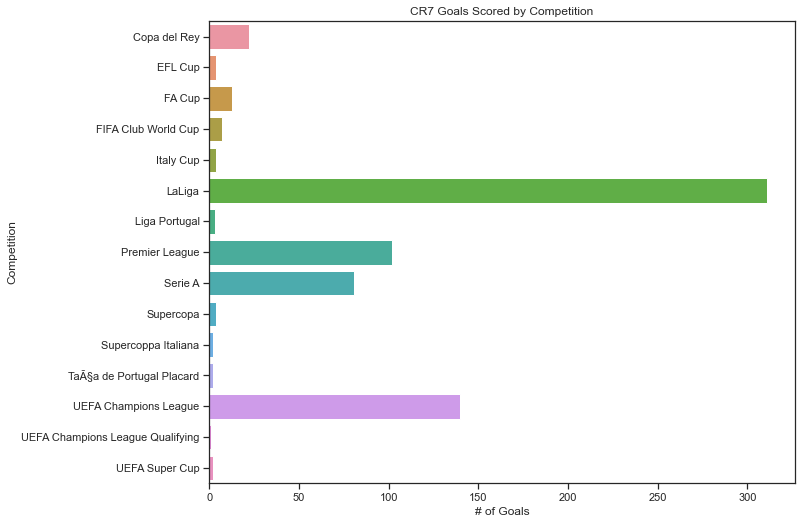

In [39]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=CompGoals, y='Competition', x='# of Goals')
ax.set(ylabel="Competition")
ax.set(xlabel="# of Goals")
ax.set(title="CR7 Goals Scored by Competition")
ax.figure.set_size_inches(10.5, 8.5)

In [40]:
TypeGoals = pd.DataFrame(CR7.groupby('Type_of_goal')['# of Goals'].apply(np.sum).reset_index())
display(TypeGoals)

,Type_of_goal,# of Goals
0,Body,15
1,Counter attack goal,4
2,Deflected shot on goal,2
3,Direct free kick,48
4,Header,112
5,Left-footed shot,110
6,Long distance kick,9
7,Penalty,128
8,Penalty rebound,3
9,Right-footed shot,251


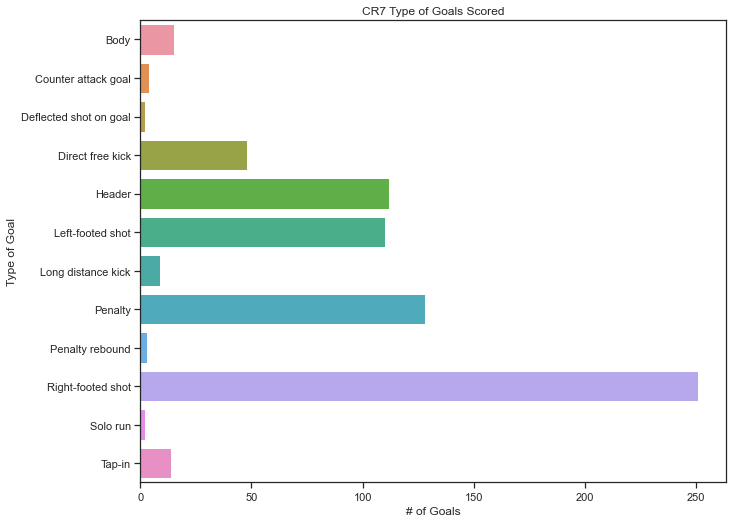

In [41]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=TypeGoals, y='Type_of_goal', x='# of Goals')
ax.set(ylabel="Type of Goal")
ax.set(xlabel="# of Goals")
ax.set(title="CR7 Type of Goals Scored")
ax.figure.set_size_inches(10.5, 8.5)

In [42]:
MinuteGoals = pd.DataFrame(CR7.groupby('Minute')['# of Goals'].apply(np.sum).reset_index())
display(MinuteGoals)

,Minute,# of Goals
0,1,1
1,10,10
2,11,6
3,12,9
4,120,1
...,...,...
97,90+4,2
98,90+5,2
99,90+6,2
100,90+7,1


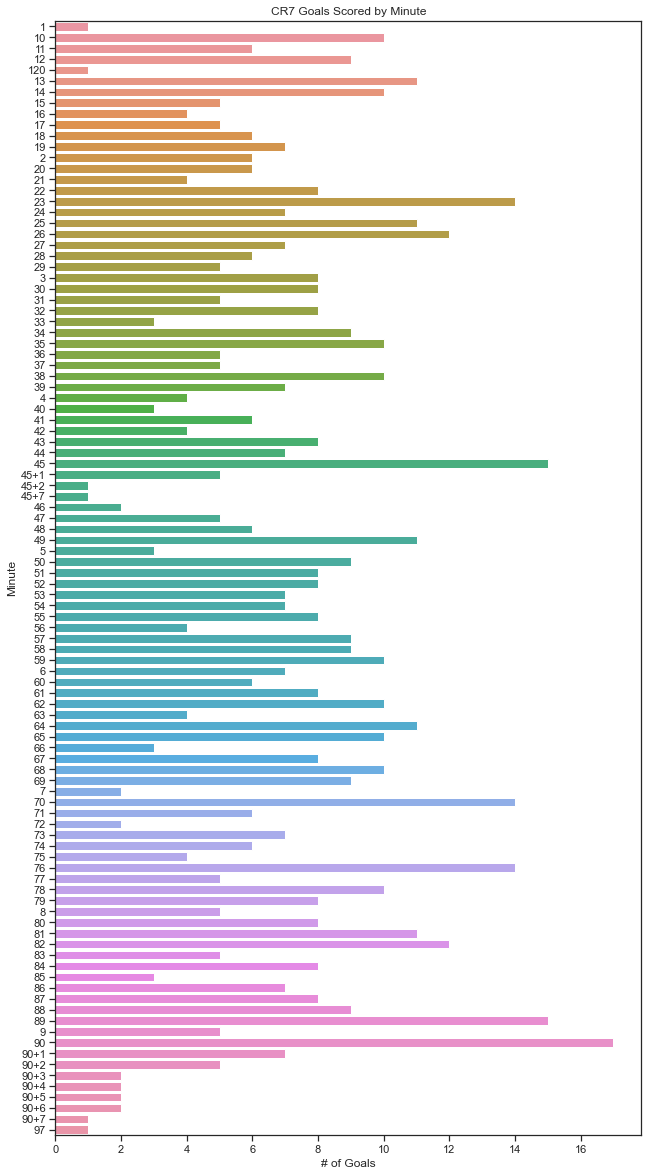

In [43]:
sns.set_theme(style="ticks",palette="muted")
ax = sns.barplot(data=MinuteGoals, y='Minute', x='# of Goals')
ax.set(ylabel="Minute")
ax.set(xlabel="# of Goals")
ax.set(title="CR7 Goals Scored by Minute")
ax.figure.set_size_inches(10.5, 20.5)